In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("COVID19BE_CASES_AGESEX.csv")

In [3]:
df_updated = df.dropna(axis=0)

In [4]:
pd.options.mode.chained_assignment = None  
df_updated["DATE"] = pd.to_datetime(df_updated["DATE"], format='%Y-%m-%d')
df_updated["DATE"] = df_updated["DATE"].dt.strftime("%Y%m%d").astype(int)
df_updated.drop(["PROVINCE","REGION","AGEGROUP","SEX"], axis=1,inplace=True)
df_updated = df_updated.groupby(df_updated['DATE']).sum()
df_updated.head()

,CASES
DATE,
20200301,19
20200302,19
20200303,34
20200304,46
20200305,81


In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_updated)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.95)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

292 16


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
290/290 - 1s - loss: 0.0224
Epoch 2/50
290/290 - 0s - loss: 0.0176
Epoch 3/50
290/290 - 0s - loss: 0.0139
Epoch 4/50
290/290 - 0s - loss: 0.0109
Epoch 5/50
290/290 - 0s - loss: 0.0089
Epoch 6/50
290/290 - 0s - loss: 0.0080
Epoch 7/50
290/290 - 0s - loss: 0.0076
Epoch 8/50
290/290 - 0s - loss: 0.0075
Epoch 9/50
290/290 - 0s - loss: 0.0077
Epoch 10/50
290/290 - 0s - loss: 0.0075
Epoch 11/50
290/290 - 0s - loss: 0.0075
Epoch 12/50
290/290 - 0s - loss: 0.0075
Epoch 13/50
290/290 - 0s - loss: 0.0075
Epoch 14/50
290/290 - 0s - loss: 0.0075
Epoch 15/50
290/290 - 0s - loss: 0.0076
Epoch 16/50
290/290 - 0s - loss: 0.0076
Epoch 17/50
290/290 - 0s - loss: 0.0075
Epoch 18/50
290/290 - 0s - loss: 0.0076
Epoch 19/50
290/290 - 0s - loss: 0.0075
Epoch 20/50
290/290 - 0s - loss: 0.0076
Epoch 21/50
290/290 - 0s - loss: 0.0076
Epoch 22/50
290/290 - 0s - loss: 0.0076
Epoch 23/50
290/290 - 0s - loss: 0.0075
Epoch 24/50
290/290 - 0s - loss: 0.0075
Epoch 25/50
290/290 - 0s - loss: 0.0076
Epoch 26/

In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1911.25 RMSE
Test Score: 1108.37 RMSE


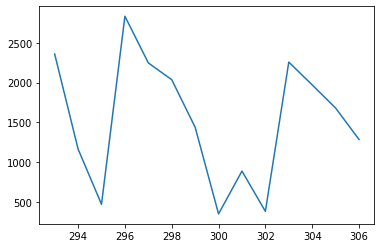

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# Future dataset

In [ ]:
# Future dataset